In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Assuming 'data.csv' contains your time series data
df = pd.read_csv('/content/gold_price_data.csv', parse_dates=['Date'], index_col='Date')


              Value
count  10787.000000
mean     653.596634
std      434.030848
min       35.100000
25%      349.200000
50%      409.350000
75%     1061.625000
max     1895.000000


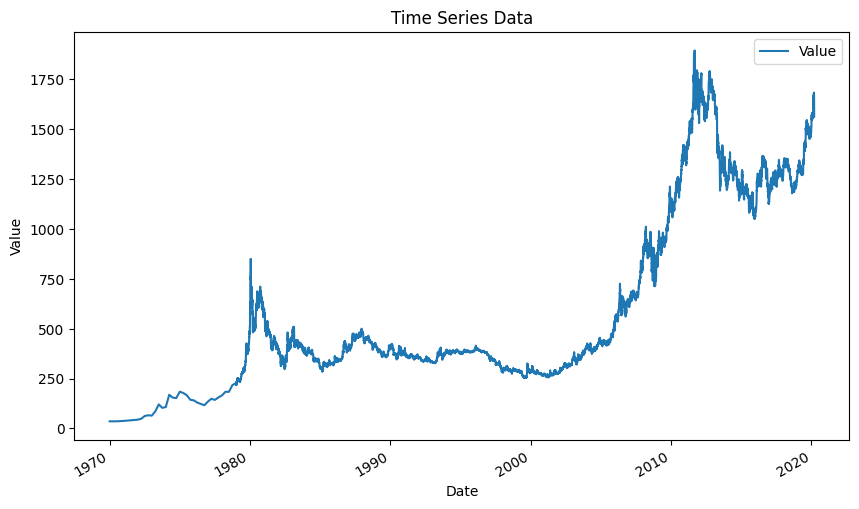

In [58]:
# Display basic statistics
print(df.describe())

# Plot the time series
df.plot(figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


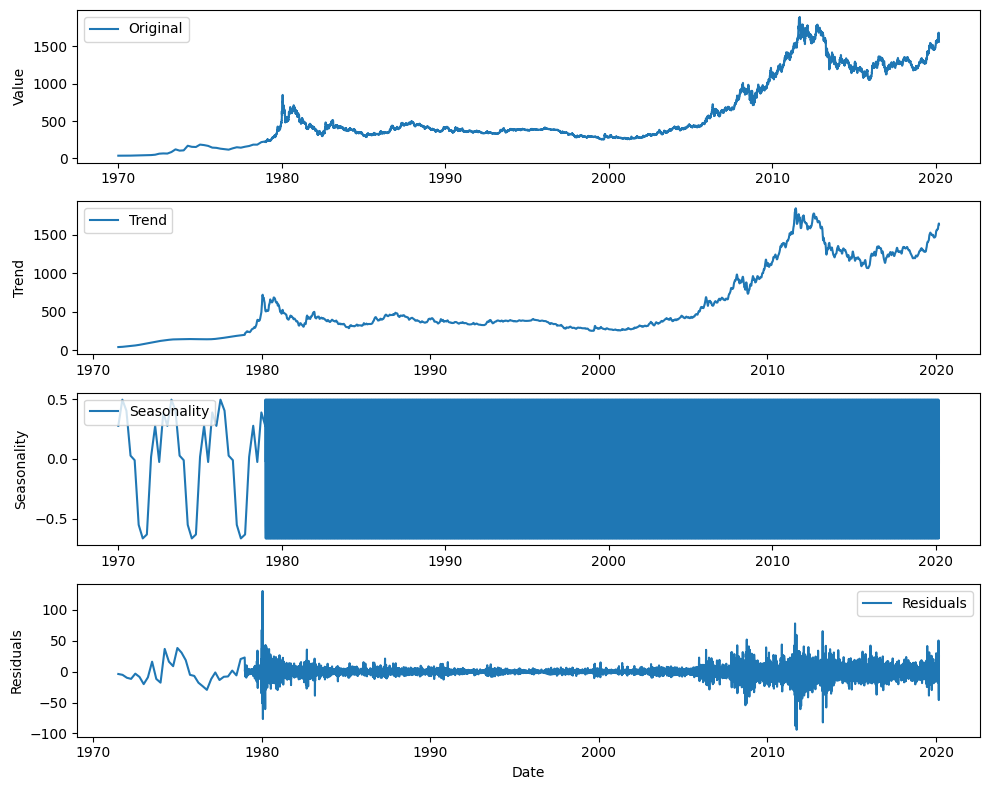

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
decomposition = seasonal_decompose(df, model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.ylabel('Value')  # Add y-axis label for the original series

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.ylabel('Trend')  # Add y-axis label for the trend component

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.ylabel('Seasonality')  # Add y-axis label for the seasonal component

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.ylabel('Residuals')  # Add y-axis label for the residual component

plt.xlabel('Date')  # Add x-axis label for all subplots
plt.tight_layout()
plt.show()


In [60]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Value'])    #Augmented Dickey-Fuller
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -0.07112124453813186
p-value: 0.9522400769147397


In [61]:
from statsmodels.tsa.arima.model import ARIMA
p=1
d=1
q=1
model = ARIMA(df, order=(p, d, q))
results = model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                10787
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -39041.451
Date:                Wed, 21 Feb 2024   AIC                          78088.902
Time:                        10:22:15   BIC                          78110.760
Sample:                             0   HQIC                         78096.273
                              - 10787                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8731      0.046    -18.972      0.000      -0.963      -0.783
ma.L1          0.8846      0.044     19.969      0.000       0.798       0.971
sigma2        81.5622      0.334    244.195      0.0

In [62]:
forecast = results.forecast(steps=10)
print(forecast)

10787    1563.356278
10788    1562.870564
10789    1563.294665
10790    1562.924362
10791    1563.247691
10792    1562.965377
10793    1563.211879
10794    1562.996646
10795    1563.184577
10796    1563.020485
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
